In [1]:
from initialsation import *
SEED = 42
IMG_SIZE = 256
# set seed for reproducibility and
set_seed(SEED)
turn_off_warnings()

preprocessing = DataPreprocessing(DATA_PATH, n_max=5, new_size=(IMG_SIZE, IMG_SIZE))
df, stats = preprocessing.get_summary_stats()
datsets = preprocessing.get_cv_splits()



In [3]:
model = model_transfer_multitask_classification(IMG_SIZE)
model.summary()
[layer.name for layer in model.layers]


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 256, 256, 3)  0           ['input_3[0][0]']                
                                                                                                  
 random_crop_1 (RandomCrop)     (None, 227, 227, 3)  0           ['rescaling_1[0][0]']            
                                                                                                  
 xception (Functional)          (None, 7, 7, 2048)   20861480    ['random_crop_1[0][0]']    

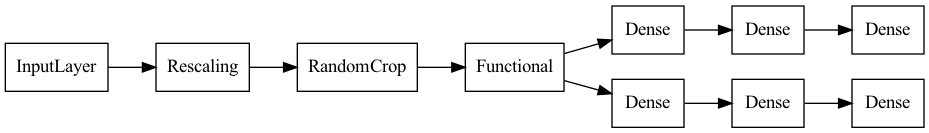

In [2]:
model = model_transfer_multitask_classification(IMG_SIZE)
tf.keras.utils.plot_model(
    model,
    rankdir="LR",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
)


In [23]:
datsets[0][0][0:1,:].squeeze().shape

(256, 256, 3)

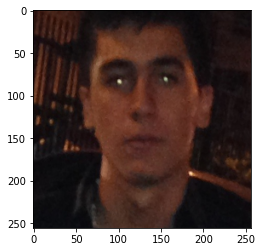

In [24]:
plt.imshow(datsets[0][0][0,:])

In [2]:
for key, val in stats.items():
    print(key, val)

no_data 16228
no_male 7657
no_female 8571
no_data_unique 2079
no_male_unique 1002
no_female_unique 1077


In [23]:
df

,image_path,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
4000,34158582@N02/landmark_aligned_face.401.9632302...,34158582@N02,9632302912_977ee467a7_o.jpg,401,0,1,1239,1273,848,848,-70,0,26
733,30601258@N03/landmark_aligned_face.2.116252690...,30601258@N03,11625269026_477c0c4ae5_o.jpg,2,4,0,152,120,780,780,-95,30,52
196,30601258@N03/landmark_aligned_face.1.105181063...,30601258@N03,10518106303_1d9f3333bb_o.jpg,1,4,1,825,1214,708,708,175,30,139
869,20254529@N04/landmark_aligned_face.14.94060122...,20254529@N04,9406012268_d049430eb0_o.jpg,14,1,1,88,917,1250,1250,15,0,95
3035,63153065@N07/landmark_aligned_face.240.9159754...,63153065@N07,9159754296_549ae926f1_o.jpg,240,4,1,1348,2043,261,261,170,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,10255165@N05/landmark_aligned_face.2024.832286...,10255165@N05,8322868410_4d37478cf7_o.jpg,2024,2,1,2887,251,357,357,-10,45,43
3621,10008401@N05/landmark_aligned_face.2236.109697...,10008401@N05,10969778483_dfee530497_o.jpg,2236,4,1,1593,1475,523,523,-95,0,163
2910,100346410@N05/landmark_aligned_face.2086.95243...,100346410@N05,9524347238_3dfc7b65ff_o.jpg,2086,3,0,2075,664,280,281,-15,0,79
1239,86629393@N00/landmark_aligned_face.1828.116969...,86629393@N00,11696988155_b2df29c2c8_o.jpg,1828,6,1,1173,879,465,466,-10,0,90


In [19]:
sum(df.gender ==0)
sum(df.gender ==1)

8571

In [12]:
df.head()

,image_path,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
4000,34158582@N02/landmark_aligned_face.401.9632302...,34158582@N02,9632302912_977ee467a7_o.jpg,401,0,1,1239,1273,848,848,-70,0,26
733,30601258@N03/landmark_aligned_face.2.116252690...,30601258@N03,11625269026_477c0c4ae5_o.jpg,2,4,0,152,120,780,780,-95,30,52
196,30601258@N03/landmark_aligned_face.1.105181063...,30601258@N03,10518106303_1d9f3333bb_o.jpg,1,4,1,825,1214,708,708,175,30,139
869,20254529@N04/landmark_aligned_face.14.94060122...,20254529@N04,9406012268_d049430eb0_o.jpg,14,1,1,88,917,1250,1250,15,0,95
3035,63153065@N07/landmark_aligned_face.240.9159754...,63153065@N07,9159754296_549ae926f1_o.jpg,240,4,1,1348,2043,261,261,170,0,27


In [11]:
no_data_point = df.shape[0]
unique_subjects = df.face_id.unique().shape[0]

2079

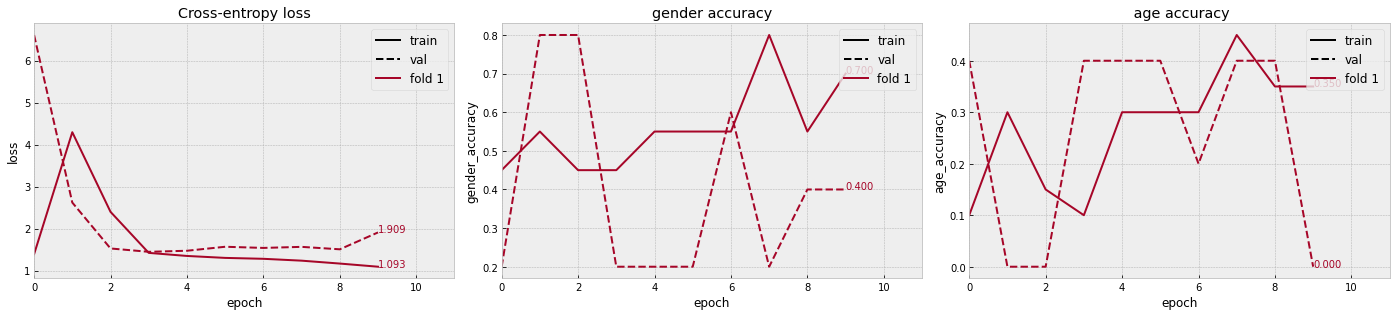

In [2]:
model, histories = load_training_results("CNN multitask")
pf.plot_histories(histories)

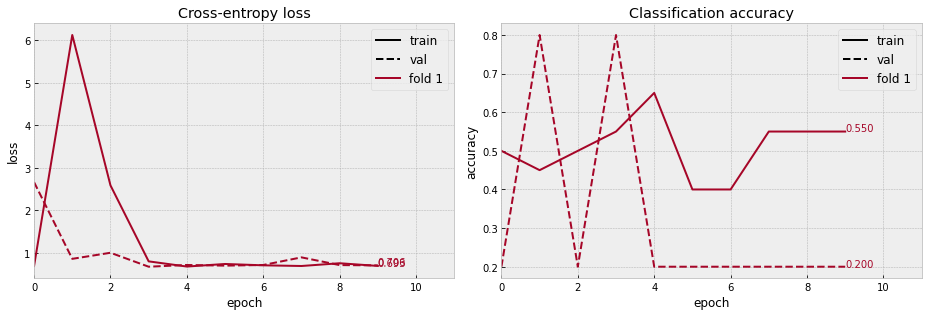

In [4]:
model, histories = load_training_results("Main Model")
pf.plot_histories(histories)

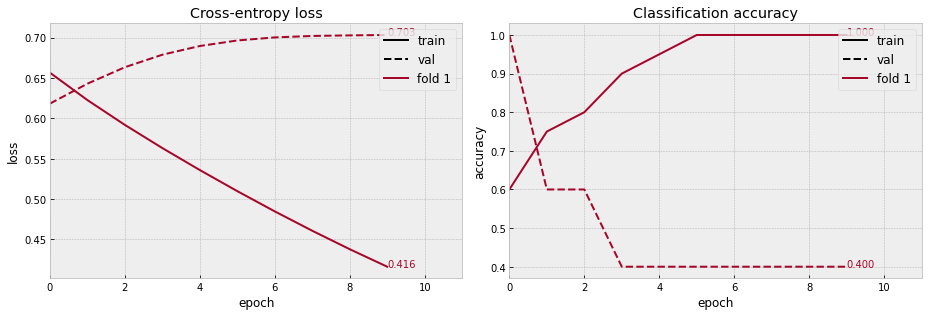

In [5]:
model, histories = load_training_results("CNN transfer")
pf.plot_histories(histories)

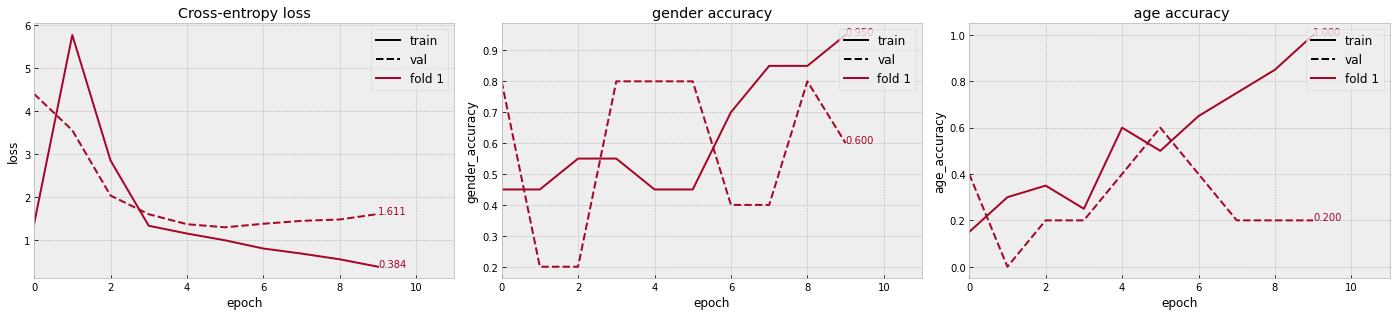

In [2]:
model, histories = load_training_results("CNN multitask")
pf.plot_histories(histories)

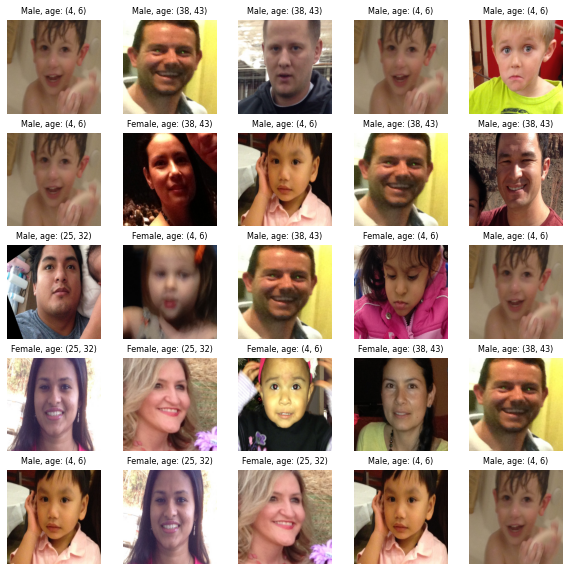

In [3]:
# make subplot of 25 random images from dataset
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        idx = np.random.randint(0, len(X_train))
        ax[i, j].imshow(X_train[idx])
        ax[i, j].axis("off")
        # make title stating gender and year
        gender = "Female" if Data.get_gender_label(gender_train[idx]) == "f" else "Male"
        age = Data.get_age_label(age_train[idx])
        ax[i, j].set_title(f"{gender}, age: {age}", fontsize=8)

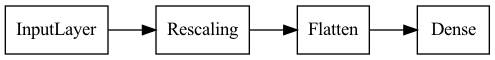

In [7]:
models = {
    "Baseline": baseline_model(img_size),
    "CNN classic": CNN_classic(img_size),
    "CNN transfer": CNN_transfer(img_size),
    "CNN multitask": CNN_multitask(img_size),
}

# print model architechtures
tf.keras.utils.plot_model(
    models["Baseline"],
    to_file="model.png",
    rankdir="LR",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
)

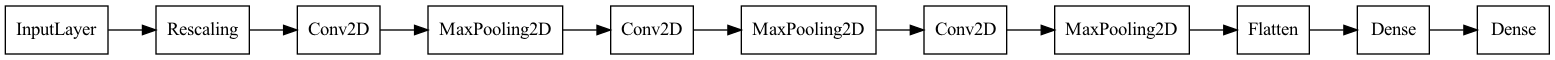

In [8]:
tf.keras.utils.plot_model(
    models["CNN classic"],
    to_file="model.png",
    rankdir="LR",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
)

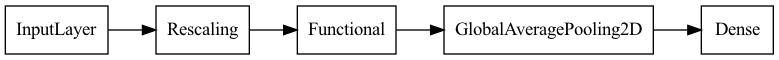

In [9]:
tf.keras.utils.plot_model(
    models["CNN transfer"],
    to_file="model.png",
    rankdir="LR",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
)

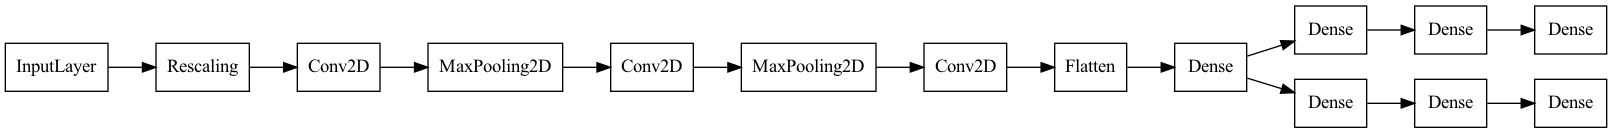

In [10]:
tf.keras.utils.plot_model(
    models["CNN multitask"],
    to_file="model.png",
    rankdir="LR",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
)

In [ ]:
"""
Helper functions
"""

# fit all the models to their respective datasets
# ** More arguments to adjust fitting procedure **
def fit_models(model_data, no_epochs, verbose=0):

    histories = {}
    for model, data in model_data.items():
        print(f"Training on Model: {model.name}")
        X_train, y_train, X_test, y_test = data

        histories[model.name] = model.fit(
            X_train,
            y_train,
            epochs=no_epochs,
            verbose=verbose,
            validation_data=(X_test, y_test),
        )
        print()
    return histories


def compile_model(
    model,
    loss=keras.losses.BinaryCrossentropy(),
    loss_weights=None,
    optimizer="adam",
    metrics=["accuracy"],
):
    if loss_weights == None:
        model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    else:
        model.compile(
            loss=loss, loss_weights=loss_weights, optimizer=optimizer, metrics=metrics
        )


def cross_validate(data_train, n_folds=5, shuffle=False):
    # get array of indexes
    idx = np.arange(0, len(data_train))
    # randomise order
    if shuffle:
        np.random.shuffle(idx)
    # split into equal sized arrays (or almost equal sized)
    split_idxs = np.array_split(idx, n_folds)
    # initialize array to store train test index pairs
    train_test_fold_idx = []
    # loop over folds
    for fold in split_idxs:
        # extract test indexes
        test_idx = fold
        # remove test indexes to gain training indexes
        train_idx = idx[~np.isin(idx, fold)]
        # append tuple to fold array
        train_test_fold_idx.append((train_idx, test_idx))
    return train_test_fold_idx


model = CNN_transfer(img_size)
model.summary()
model_classic = CNN_classic(img_size)
compile_model(model_classic)

model_multitask = CNN_multitask(img_size)
multitask_loss = {
    "gender": keras.losses.BinaryCrossentropy(),
    "age": keras.losses.SparseCategoricalCrossentropy(),
}
gamma = 0.5
multitask_loss_weights = ({"gender": gamma, "age": 1 - gamma},)
compile_model(model_multitask, multitask_loss)

model_transfer = CNN_transfer(img_size)
compile_model(model_transfer)


model_data = {}
model_data[model_classic] = [X_train, gender_train, X_test, gender_test]
model_data[model_multitask] = [
    X_train,
    (gender_train, age_train),
    X_test,
    (gender_test, age_test),
]
model_data[model_transfer] = [X_train, gender_train, X_test, gender_test]

fit_models(model_data, 2, verbose=1)